# Convolution

We begin by reading in the given data and creating plots to study the structure and type of the data given.

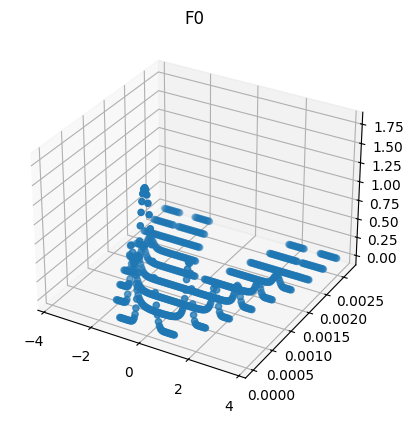

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

x0, y0, z0 = np.loadtxt('convolve_raw_0.dat', unpack=True)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x0, y0, z0)
plt.title("F0")
plt.show()


<Figure size 640x480 with 0 Axes>

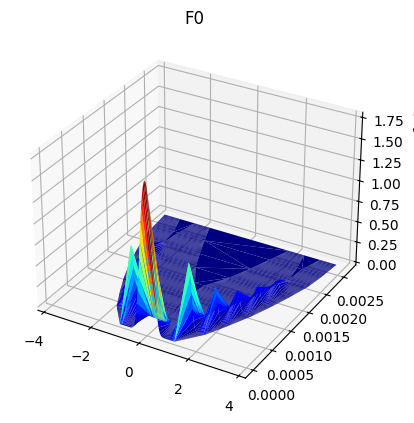

In [110]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
ax.plot_trisurf(x0, y0, z0, cmap=cm.jet, linewidth=0.1)
plt.title("F0")
plt.show()


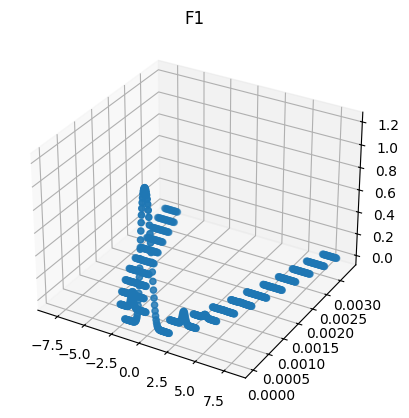

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

x1, y1, z1 = np.loadtxt('convolve_raw_1.dat', unpack=True)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1)
plt.title("F1")
plt.show()


<Figure size 640x480 with 0 Axes>

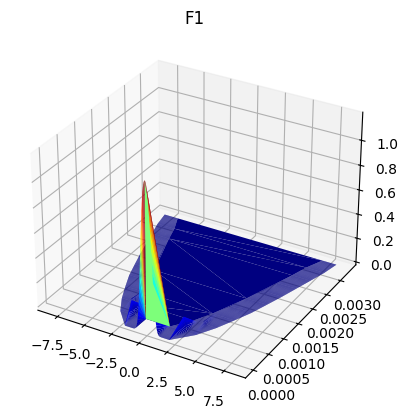

In [112]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
ax.plot_trisurf(x1, y1, z1, cmap=cm.jet, linewidth=0.1)
plt.title("F1")
plt.show()

## Two dimensional Plots and Interpolation of Functions

Looking at the data and the previous graphs, it appears the output values differ immensely. Let's structure the data using some 2d plots and doing some interpolation to get a better idea of the functions.

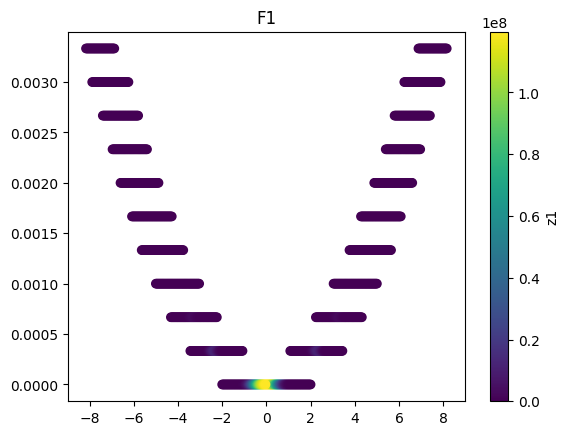

In [113]:
plt.scatter(x1, y1, c=z1)
plt.colorbar(label='z1')
plt.title('F1')
plt.show()


In [114]:
from scipy.interpolate import CloughTocher2DInterpolator
# interpolation for data from file ending with 1
grid_x1, grid_y1 = np.mgrid[-8.2:8.2:0.04, 0:0.003333:0.000333]  
points1 = np.array([x1, y1]).T
clough_interp1 = CloughTocher2DInterpolator(points1, z1, fill_value=0, rescale=True)
clough_output1 = clough_interp1(grid_x1, grid_y1) # map the data using the Clough Tocher interpolation

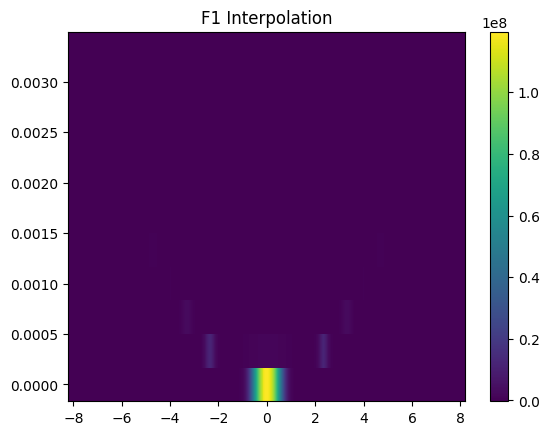

In [115]:
# graph the interpolation
plt.pcolormesh(grid_x1, grid_y1,  clough_output1, shading="auto")
plt.colorbar()
plt.title("F1 Interpolation")
plt.show()


We now look at the data from the file annotated with 0.

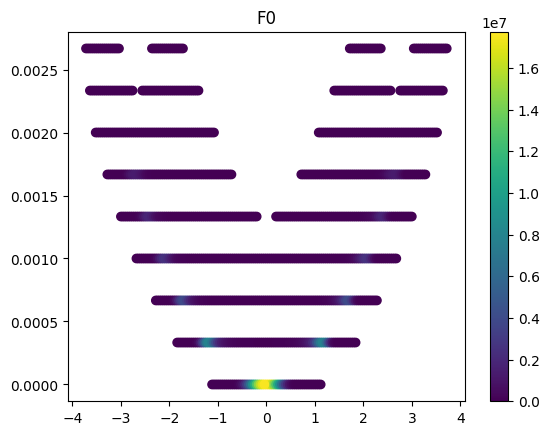

In [116]:
plt.scatter(x0, y0, c=z0)
plt.colorbar()
plt.title("F0")
plt.show()

In [117]:
# interpolation for data from file annotated with 0
from scipy.interpolate import CloughTocher2DInterpolator
grid_x0, grid_y0 = np.mgrid[-4:4:0.04, 0:0.003:0.000333]  
points0 = np.array([x0, y0]).T
clough_interp0 = CloughTocher2DInterpolator(points0, z0, fill_value=0, rescale=True)
clough_output0 = clough_interp0(grid_x0, grid_y0) # map the data using the Clough Tocher interpolation

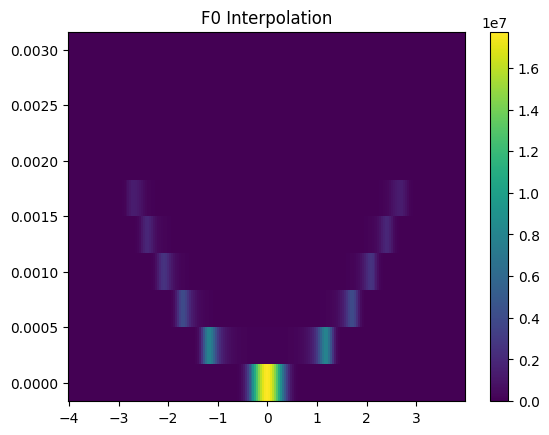

In [118]:
plt.pcolormesh(grid_x0, grid_y0,  clough_output0, shading="auto")
plt.colorbar()
plt.title("F0 Interpolation")
plt.show()


It appears we may be dealing with a delta function or something approximating a delta function.

## Using the Interlation to Find Data Points on Same Grid

We use our interpolations  to find a set of data points on an identical grid of values. We can then use the [scipy convolution 2d function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) to find the convolution. 

In [119]:
con_x, con_y = np.mgrid[-8.2:8.2:0.04, 0:0.003333:0.000333]
con_z0 = clough_interp0(con_x, con_y)
con_z1 = clough_interp1(con_x, con_y)

In [120]:
import numpy as np
from scipy import signal

# Calculating the 2D convolution
convolution_result = signal.convolve2d(con_z0, con_z1, mode='same') # keep the grid the same size as inputs

# the above does a discrete convolution, and does not take into account the mesh size which is
delta = 0.04*0.000333
con_result = delta*convolution_result

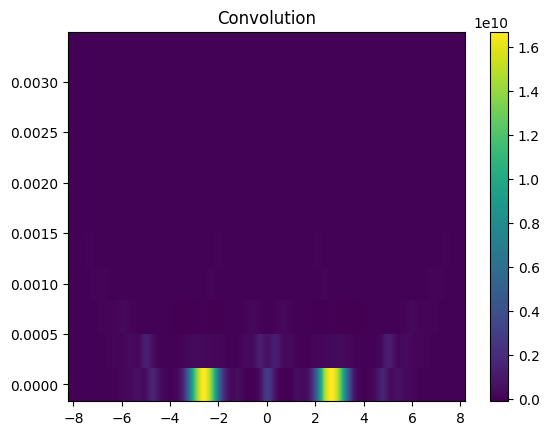

In [121]:
plt.pcolormesh(con_x, con_y,  con_result, shading="auto")
plt.colorbar()
plt.title("Convolution")
plt.show()
